Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard

Question 1 - Extracting Tesla Stock Data Using yfinance -

In [1]:
!pip install yfinance pandas matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index to get Date as a column
tesla_data.reset_index(inplace=True)

# Display the first few rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2: Extracting Tesla Revenue Data Using Web Scraping

In [7]:
# Import necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Load the HTML page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Step 2: Parse the HTML content
# Use "lxml" parser for better reliability
soup = BeautifulSoup(response.content, "lxml")

# Step 3: Find the table
table = soup.find("table")
if table is None:
    raise ValueError("The table could not be found. Verify the HTML structure or URL.")
else:
    print("Table found!")

# Step 4: Extract table data
rows = table.find_all("tr")  # Find all rows in the table
tesla_revenue = []  # Initialize list to store data

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")  # Find all columns in the row
    if len(cols) >= 2:  # Ensure there are at least 2 columns
        tesla_revenue.append({
            "Date": cols[0].text.strip(),  # Extract the first column (Date)
            "Revenue": cols[1].text.strip()  # Extract the second column (Revenue)
        })

# Step 5: Create a DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue)

# Display the first few rows of the DataFrame
print(tesla_revenue_df.head())


Table found!
   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Question 3 - Extracting GameStop Stock Data Using yfinance 

In [9]:
# Download GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")

# Reset index to get Date as a column
gamestop_data.reset_index(inplace=True)

# Display the first few rows
print(gamestop_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4- Extracting GameStop Revenue Data Using Webscraping

In [10]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text

In [11]:
response = requests.get(url2)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table and extract data
table = soup.find("table")
rows = table.find_all("tr")
gamestop_revenue = []

for row in rows[1:]:
    cols = row.find_all("td")
    gamestop_revenue.append({
        "Date": cols[0].text.strip(),
        "Revenue": cols[1].text.strip()
    })

gamestop_revenue_df = pd.DataFrame(gamestop_revenue)
print(gamestop_revenue_df.head())

   Date Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364


Question 5 - Tesla Stock and Revenue Dashboard

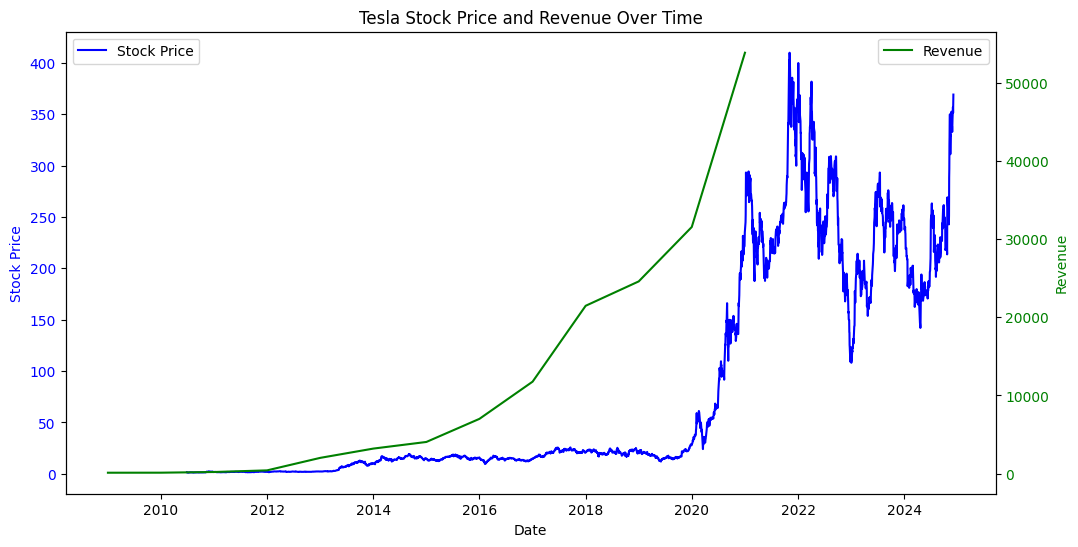

In [20]:
# Ensure revenue_data is a pandas DataFrame
tesla_revenue = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# Convert Revenue to numeric after cleaning
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').str.replace('$', '').astype(float)

# Ensure Date is in datetime format and sorted
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue = tesla_revenue.sort_values("Date")

tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_data = tesla_data.sort_values("Date")

# Plot Tesla dashboard
make_graph(tesla_data, tesla_revenue, 'Tesla')


Question 6 - GameStop Stock and Revenue Dashboard

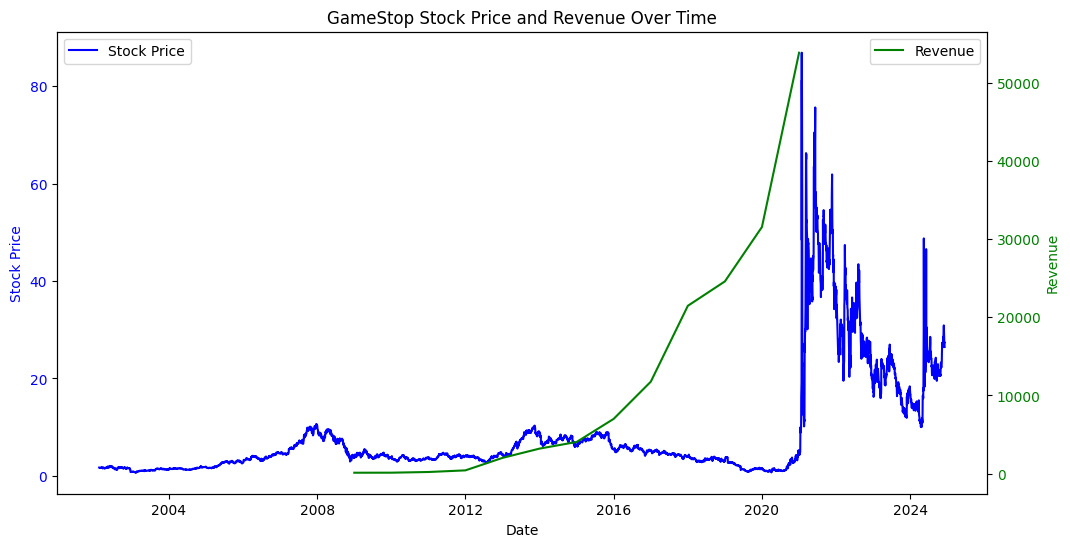

In [23]:
# Fetch GameStop Stock Data
gme = yf.Ticker('GME')
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Clean and process GameStop Revenue Data
url_gme = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data_gme = requests.get(url_gme).content
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

# Extract table data
table_gme = soup_gme.find('table')
table_rows_gme = table_gme.find_all('tr')
data_gme = []

for tr in table_rows_gme:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data_gme.append(row)

# Convert to DataFrame
gme_revenue = pd.DataFrame(data_gme, columns=["Date", "Revenue"])

# Clean Revenue and Date columns
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').str.replace('$', '').astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue = gme_revenue.sort_values("Date")

gme_data["Date"] = pd.to_datetime(gme_data["Date"])
gme_data = gme_data.sort_values("Date")

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')

